![](img/logo.png)

# K-nearest neighbors
## Yoav Ram

# Supervised learning

Supervised learning consists in learning the link between two datasets: the observed data `X` and an external variable `y` that we are trying to predict, usually called “target” or “labels”. 

$$
X \to Y
$$

There are two fundamental supervised learning problems: regression and classification.
In classification, we need to predict a (discrete) class.
In regression, we need to predict a number.

We start with classification. In this case, _X_ can be anything, and _Y_ is a category (cat, dog, etc.) encoded as an integer (0, 1, etc.)

In [5]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

import sklearn.datasets
from sklearn.model_selection import train_test_split, LearningCurveDisplay, ValidationCurveDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import ConfusionMatrixDisplay, PredictionErrorDisplay

red, blue, green = plt.color_sequences['Set1'][:3]
pio.templates.default = "simple_white"

# Scikit-learn

[![scikit-learn logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)](http://scikit-learn.org/)

*Scikit-learn* is a Python package for machine learning:

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

# Seeds dataset

[The seeds dataset](https://archive.ics.uci.edu/ml/datasets/seeds) is a classification task consisting in identifying 3 different cultivars of wheat (Kama, Rosa and Canadian) from their seed features.

![wheat](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Naked_and_hulled_wheat.jpg/320px-Naked_and_hulled_wheat.jpg)

Let's start by loading the dataset.

In [2]:
df = pd.read_csv('../data/seeds_dataset.txt', sep='\t')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [12]:
target_name = 'cultivar'
df[target_name] = pd.Categorical(df[target_name])
feature_names = list(df.columns)
feature_names.remove(target_name)


X = df[feature_names]
y = df[target_name]

Let's look at a pair plot of the data to understand what we are dealing with.

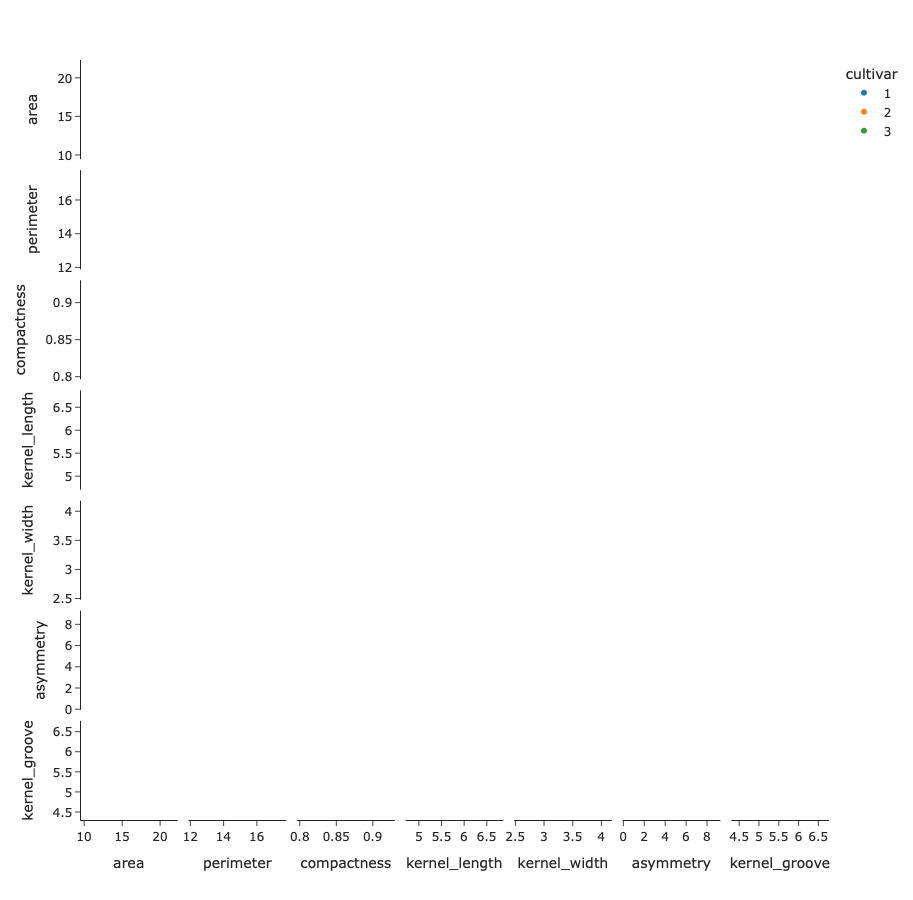

In [16]:
fig = px.scatter_matrix(df, color='cultivar', dimensions=feature_names, width=900, height=900)
fig.update_traces(diagonal_visible=False)

# Training set and testing set
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.

Split the dataset to train and test data using a random permutation - this is easily done with functions from the `model_selection` module, which has many methods to split datasets. We'll use a very simple one, `train_test_split` which just splits that data by sampling a fraction of the rows to the training set and the rest to the test set (without replacement).

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# KNN classifier

The simplest possible classifier is the **nearest neighbor**: given a new observation, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

For example, if we have examples of red triangles and blue squares, how would we classify the green circle? Is it a triangle or a square?

![KNN](img/knn.png)

All supervised estimators in *scikit-learn* implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

Import the nearest-neighbor classifier, then create and fit it:

In [18]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

Predict the labels (cultivar) for the test data and compare with the real labels:

In [19]:
y_hat = classifier.predict(X_test)
print(y_hat)
print(y_test.values) # .values gives the numpy array instead of a pandas column
print('Accuracy:', classifier.score(X_test, y_test))

[1 2 1 1 3 2 2 2 2 3 1 3 1 3 2 2 3 1 1 1 3 1 1 1 2 1 2 1 3 3 2 3 1 2 3 3 3
 2 3 1 3 1 2 3 1 2 2 1 1 2 1 2 3 3 1 1 2 2 2 2 3 2 2 3 1 1 3 1 3 2]
[1, 2, 1, 1, 3, ..., 1, 1, 1, 3, 2]
Length: 70
Categories (3, int64): [1, 2, 3]
Accuracy: 0.9


We can also look at the average image for each class, this should tell us if there is enonugh signal in the data to be learned from. 

# Regression

Now we try to predict a continuous variable $y$.

We'll work with the diabetes dataset:
> Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

In [20]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
n_features = len(feature_names)

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's look at the features (`X`). Note that they are scaled to mean of zero and the same standard deviation.

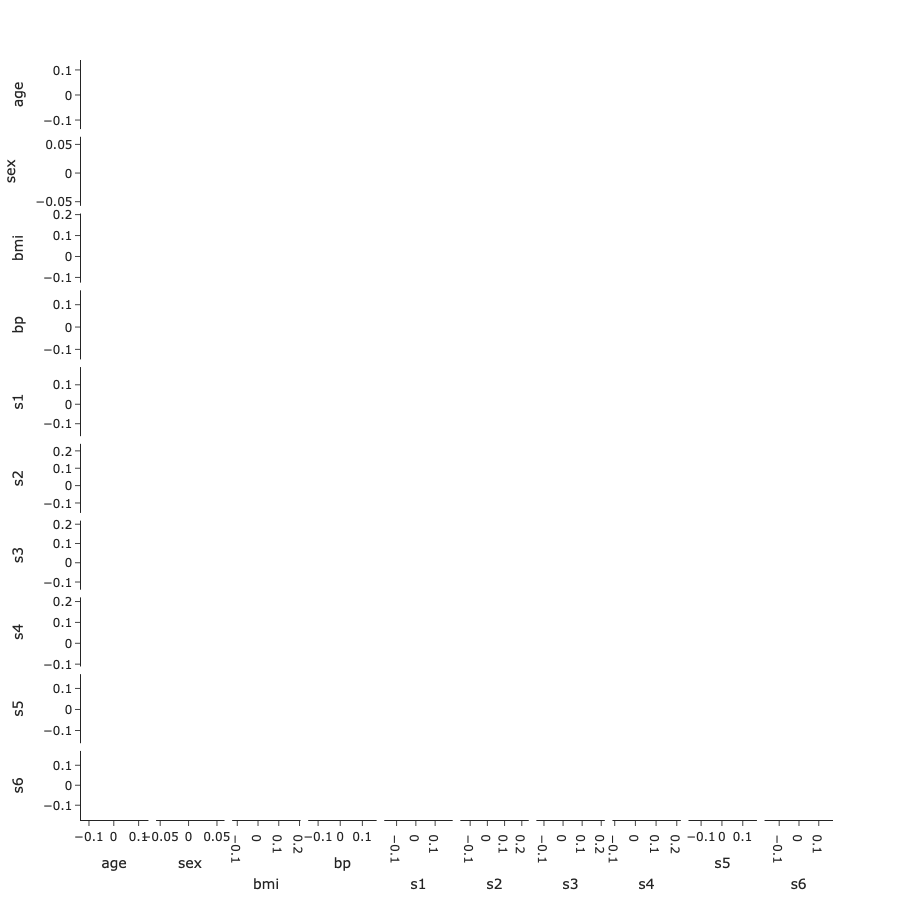

In [21]:
fig = px.scatter_matrix(df, dimensions=feature_names, width=900, height=900)
fig.update_traces(diagonal_visible=False)

Let's look at the distribution of the target (`y`):

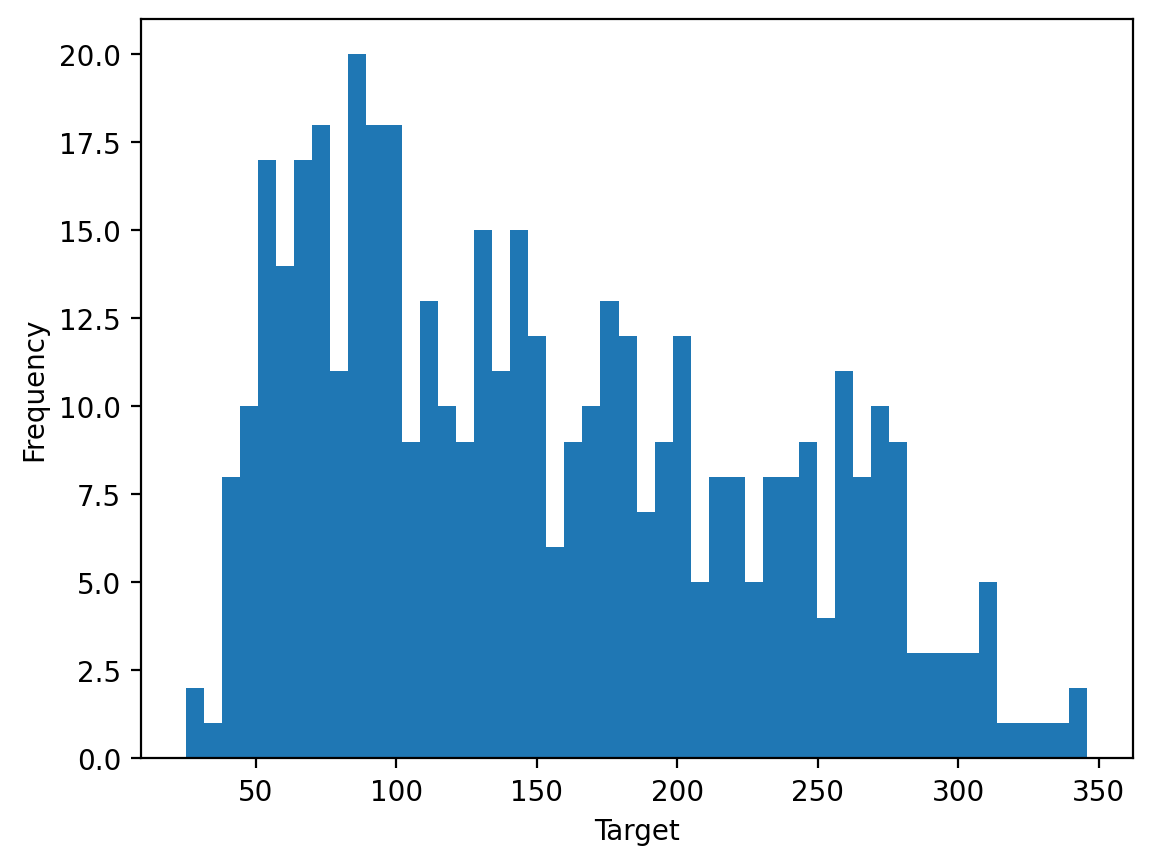

In [22]:
plt.hist(y, bins=50)
plt.xlabel('Target')
plt.ylabel('Frequency');

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

Let's use a k-nearest neighbors model to do regression.
In this case the predicted value is a weighted average of the neighbors.

Lets run the regression and print the model score.
For regression we usually use $R^2$ -- the fraction of variance in the target explained by the model.

In [24]:
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print('R2 = {:.2f}'.format(score))

R2 = 0.39


How good is the model? We can plot a diagnostic plot: a **prediction error plot**. 
This plot shows the prediction $\hat{y}$ vs the actual $y$ (for the test data)
The dashed line is a $\hat{y}=y$ line, which is where we want the points to be.

We can conclude that the predictions are over-estimating when $y$ is low and under-estimating when $y$ is high.
Why does this makes sense?

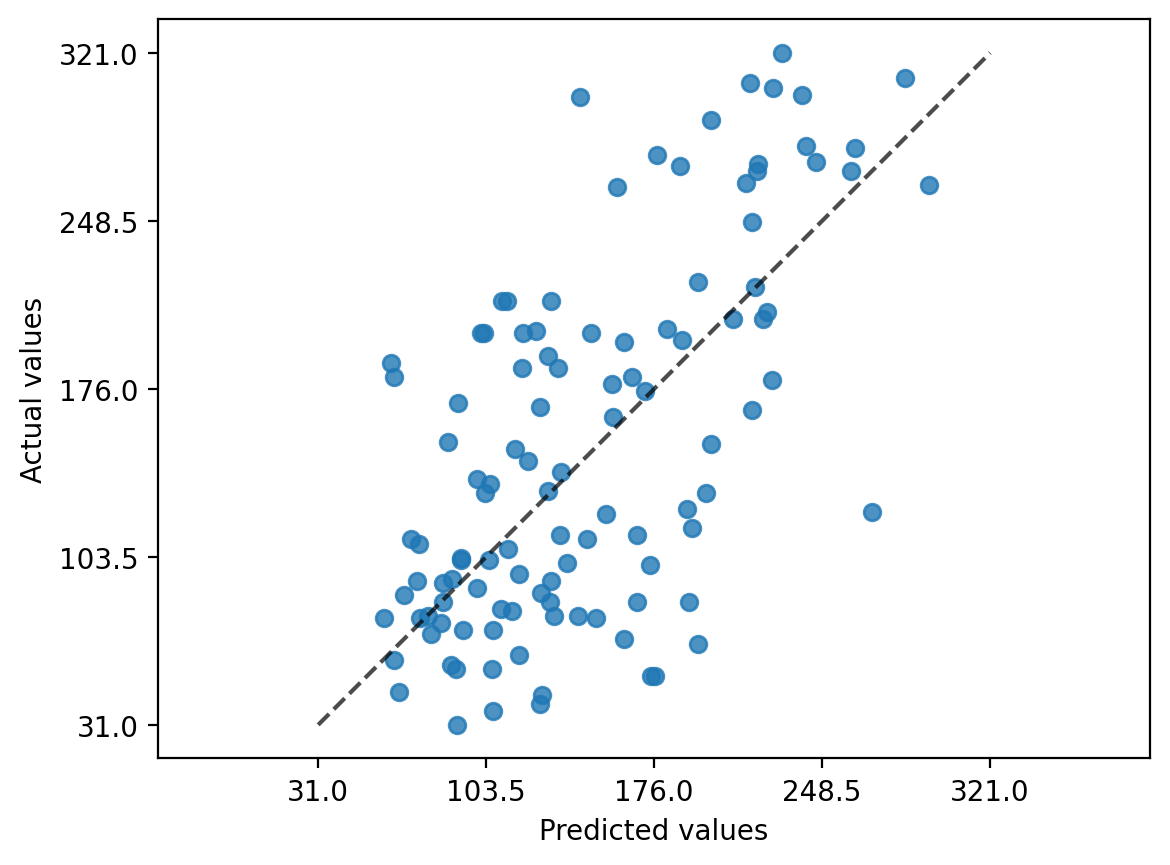

In [25]:
PredictionErrorDisplay.from_estimator(regressor, X=X_test, y=y_test, kind="actual_vs_predicted");

An interesting question that may arise is: "Do we have enough data?" 

To tackle this, we can try to look at the score of the model with increasing amount of samples, and see if the score has saturated (stabilized), or is still increasing.

This is called a **learning curve**. 
The plot shows the training and testing score with increasing number of training examples. The scores show the mean and standard deviation of several estimates using cross-validation.

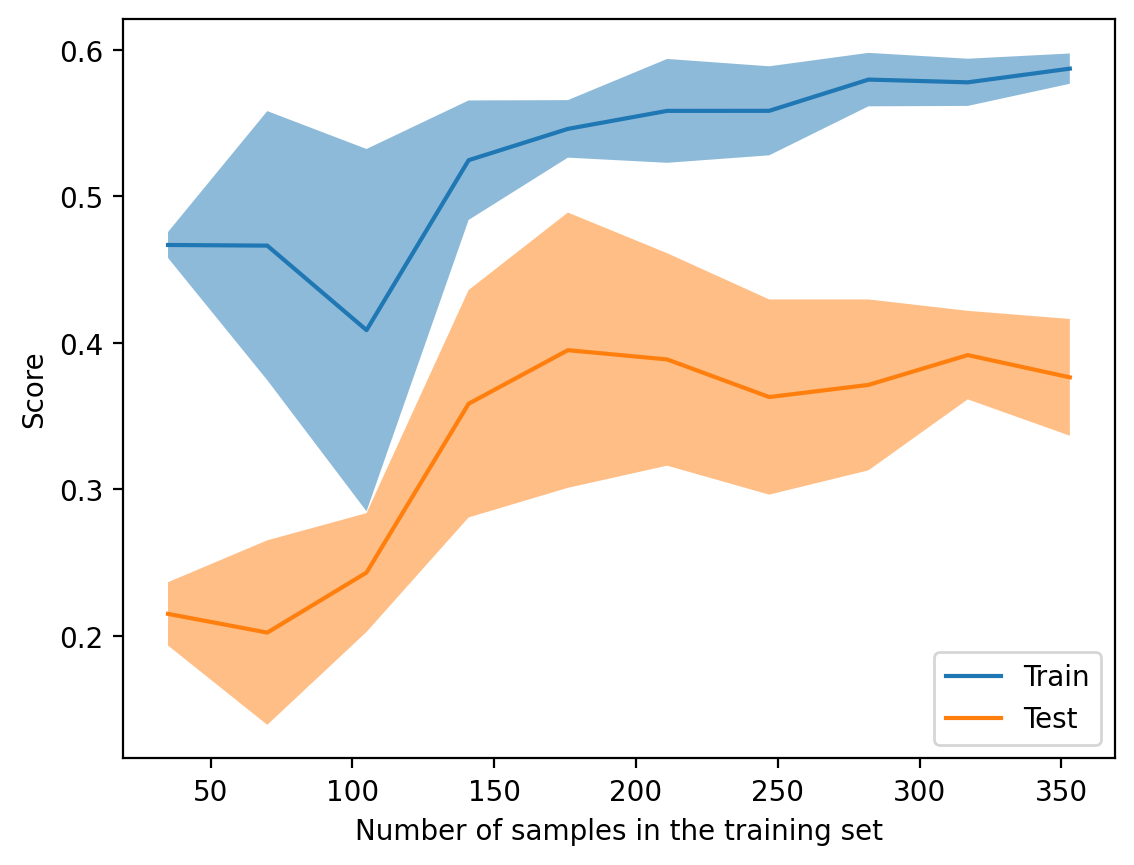

In [26]:
LearningCurveDisplay.from_estimator(regressor, X, y, train_sizes=np.arange(0.1, 1.1, 0.1));

It looks like we have enough sample, and could actually be satisfied with even less - about 200-250.

What about the number of neighbors we use? How many neighbors should we use?

To check this, we can use a **validation curve**, which computes the scores (using cross-validation) for various number of neighbors -- a similar approach can be used for other hyper-parameters of the estimator.

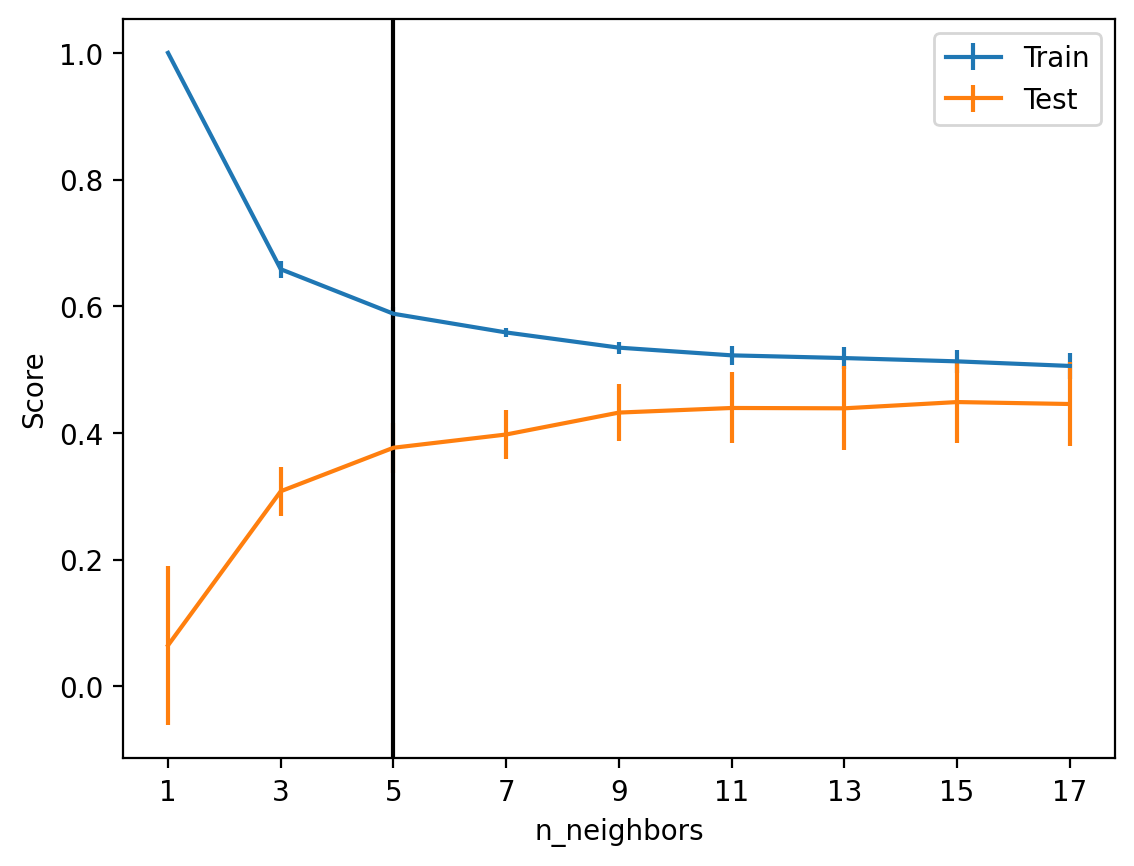

In [27]:
disp = ValidationCurveDisplay.from_estimator(
    regressor, X, y, 
    param_name='n_neighbors', param_range=(1, 3, 5, 7, 9, 11, 13, 15, 17), 
    std_display_style="errorbar"
)
plt.xticks(disp.param_range)
plt.axvline(5, color='k');

It seems like the default -- 5 neighbors -- is over-fitting, and that a better choise is 9 neighbors.

# References

- [Choosing the right estimator](https://scikit-learn.org/stable/machine_learning_map.html) flow chart.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)